In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

In [121]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [122]:
data = pd.read_csv('/Users/williambrudenell/code/DomNau1001/Risk_ICU/raw_data/training_v2.csv')
df = data.drop_duplicates()
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [92]:
df_d1 = df.loc[:, ~df.columns.str.contains('h1', case=False)]
df_d1

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.70,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,48.0,96.0,68.0,NaN,NaN,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,NaN,NaN,148.0,105.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,

In [123]:
columns_to_drop = []
for column in df.columns.tolist():
    if (df[column].isnull().sum()/df.shape[0]) >= 0.25:
        columns_to_drop.append(column)
columns_to_drop

['albumin_apache',
 'bilirubin_apache',
 'fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_m

In [125]:
df_clean = data.drop(columns = ["hospital_admit_source", "icu_admit_source","readmission_status", "pre_icu_los_days", "encounter_id", "patient_id", "hospital_id", "icu_stay_type", "icu_type", "icu_id", "apache_3j_bodysystem", "apache_2_bodysystem", "apache_4a_hospital_death_prob", "height", "weight", "aids", "lymphoma", "leukemia", 'albumin_apache',
                                    'bilirubin_apache',
                                    'fio2_apache',
                                    'paco2_apache',
                                    'paco2_for_ph_apache',
                                    'pao2_apache',
                                    'ph_apache',
                                    'urineoutput_apache',
                                    'd1_diasbp_invasive_max',
                                    'd1_diasbp_invasive_min',
                                    'd1_mbp_invasive_max',
                                    'd1_mbp_invasive_min',
                                    'd1_sysbp_invasive_max',
                                    'd1_sysbp_invasive_min',
                                    'h1_diasbp_invasive_max',
                                    'h1_diasbp_invasive_min',
                                    'h1_mbp_invasive_max',
                                    'h1_mbp_invasive_min',
                                    'h1_sysbp_invasive_max',
                                    'h1_sysbp_invasive_min',
                                    'd1_albumin_max',
                                    'd1_albumin_min',
                                    'd1_bilirubin_max',
                                    'd1_bilirubin_min',
                                    'd1_inr_max',
                                    'd1_inr_min',
                                    'd1_lactate_max',
                                    'd1_lactate_min',
                                    'h1_albumin_max',
                                    'h1_albumin_min',
                                    'h1_bilirubin_max',
                                    'h1_bilirubin_min',
                                    'h1_bun_max',
                                    'h1_bun_min',
                                    'h1_calcium_max',
                                    'h1_calcium_min',
                                    'h1_creatinine_max',
                                    'h1_creatinine_min',
                                    'h1_glucose_max',
                                    'h1_glucose_min',
                                    'h1_hco3_max',
                                    'h1_hco3_min',
                                    'h1_hemaglobin_max',
                                    'h1_hemaglobin_min',
                                    'h1_hematocrit_max',
                                    'h1_hematocrit_min',
                                    'h1_inr_max',
                                    'h1_inr_min',
                                    'h1_lactate_max',
                                    'h1_lactate_min',
                                    'h1_platelets_max',
                                    'h1_platelets_min',
                                    'h1_potassium_max',
                                    'h1_potassium_min',
                                    'h1_sodium_max',
                                    'h1_sodium_min',
                                    'h1_wbc_max',
                                    'h1_wbc_min',
                                    'd1_arterial_pco2_max',
                                    'd1_arterial_pco2_min',
                                    'd1_arterial_ph_max',
                                    'd1_arterial_ph_min',
                                    'd1_arterial_po2_max',
                                    'd1_arterial_po2_min',
                                    'd1_pao2fio2ratio_max',
                                    'd1_pao2fio2ratio_min',
                                    'h1_arterial_pco2_max',
                                    'h1_arterial_pco2_min',
                                    'h1_arterial_ph_max',
                                    'h1_arterial_ph_min',
                                    'h1_arterial_po2_max',
                                    'h1_arterial_po2_min',
                                    'h1_pao2fio2ratio_max',
                                    'h1_pao2fio2ratio_min'])

df_clean = df_clean[df_clean["elective_surgery"] != 1]

keywords = ["h1", "apache", "noninvasive"]
columns_to_keep = [col for col in df_clean.columns if not any(keyword in col for keyword in keywords)]
df_clean["gcs_eyes"] = data["gcs_eyes_apache"]
df_clean["gcs_motor"] = data["gcs_motor_apache"]
df_clean["gcs_verbal"] = data["gcs_verbal_apache"]
df_clean["ventilated"] = data["ventilated_apache"]
df_clean = df_clean[columns_to_keep].drop(columns = ["elective_surgery"])

df_clean.head(4)

,hospital_death,age,bmi,ethnicity,gender,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,solid_tumor_with_metastasis
0,0,68.0,22.73,Caucasian,M,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.0,1.0,0.0,0.0,0.0
1,0,77.0,27.42,Caucasian,F,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.0,1.0,0.0,0.0,0.0
2,0,25.0,31.95,Caucasian,F,88.0,48.0,96.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,0,19.0,NaN,Caucasian,M,99.0,57.0,89.0,60.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,37.2,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [127]:
df_clean.shape

(74862, 46)

In [128]:
df_clean.nunique()

hospital_death                     2
age                               74
bmi                            30649
ethnicity                          6
gender                             2
d1_diasbp_max                    120
d1_diasbp_min                     78
d1_heartrate_max                 120
d1_heartrate_min                 154
d1_mbp_max                       125
d1_mbp_min                        91
d1_resprate_max                   79
d1_resprate_min                   52
d1_spo2_max                       41
d1_spo2_min                      101
d1_sysbp_max                     143
d1_sysbp_min                     120
d1_temp_max                      185
d1_temp_min                      205
d1_bun_max                       482
d1_bun_min                       458
d1_calcium_max                    47
d1_calcium_min                    49
d1_creatinine_max               1156
d1_creatinine_min               1058
d1_glucose_max                   538
d1_glucose_min                   256
d

In [129]:
y = df_clean["hospital_death"]
X = df_clean.drop(columns = "hospital_death")

In [130]:
X.isnull().sum().sort_values(ascending=False)/len(data)*100

d1_hco3_max                    13.718884
d1_hco3_min                    13.718884
d1_platelets_min               13.027597
d1_platelets_max               13.027597
d1_wbc_min                     12.697218
d1_wbc_max                     12.697218
d1_calcium_min                 11.936149
d1_calcium_max                 11.936149
d1_hemaglobin_min              11.894715
d1_hemaglobin_max              11.894715
d1_hematocrit_max              11.510909
d1_hematocrit_min              11.510909
d1_bun_max                      9.454494
d1_bun_min                      9.454494
d1_creatinine_min               9.356362
d1_creatinine_max               9.356362
d1_potassium_max                9.199350
d1_potassium_min                9.199350
d1_sodium_max                   9.154645
d1_sodium_min                   9.154645
d1_glucose_min                  5.513940
d1_glucose_max                  5.513940
age                             4.186975
bmi                             3.121695
d1_temp_min     

In [131]:
nums_pre = X.select_dtypes(include=[np.number])
nums_pre.drop(columns = ["diabetes_mellitus", "cirrhosis", "hepatic_failure", "immunosuppression", "solid_tumor_with_metastasis"], inplace = True)

str_pre = X.select_dtypes(exclude = np.number)
str_pre["diabetes_mellitus"] = X["diabetes_mellitus"]
str_pre["cirrhosis"] = X["cirrhosis"]
str_pre["hepatic_failure"] = X["hepatic_failure"]
str_pre["immunosuppression"] = X["immunosuppression"]
str_pre["solid_tumor_with_metastasis"] = X["solid_tumor_with_metastasis"]


In [132]:
imputer_str = SimpleImputer(strategy = "most_frequent")
imputer_nums = SimpleImputer(strategy = "median")

In [135]:
str = imputer_str.fit_transform(str_pre)
nums = imputer_nums.fit_transform(nums_pre)

In [136]:
str_post = pd.DataFrame(str, columns = str_pre.columns)
nums_post = pd.DataFrame(nums, columns = nums_pre.columns)

In [137]:
X_post = pd.concat([str_post, nums_post], axis = 1, sort = False)

In [138]:
X_post.shape

(74862, 45)

In [139]:
X.shape

(74862, 45)

/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/72034766.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


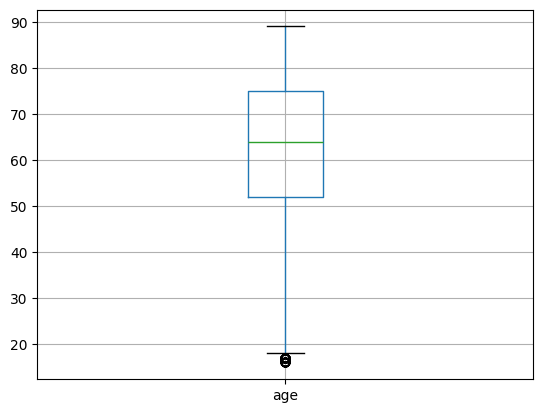

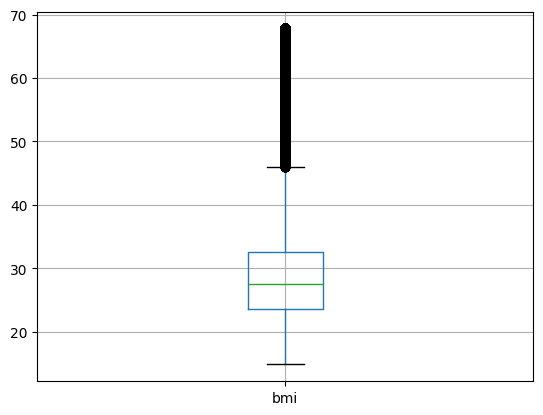

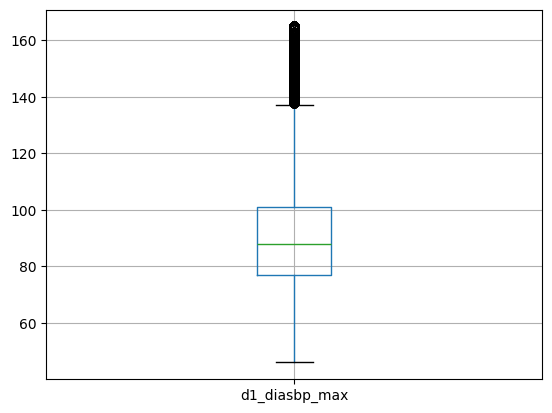

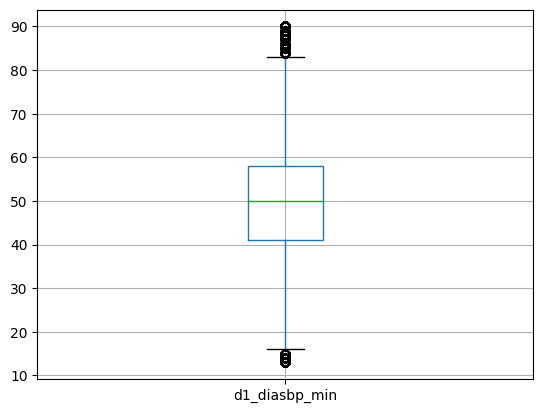

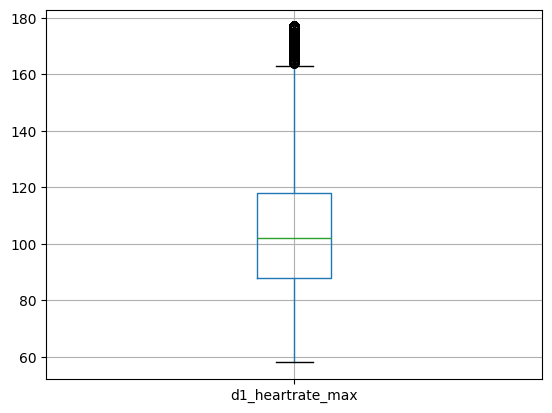

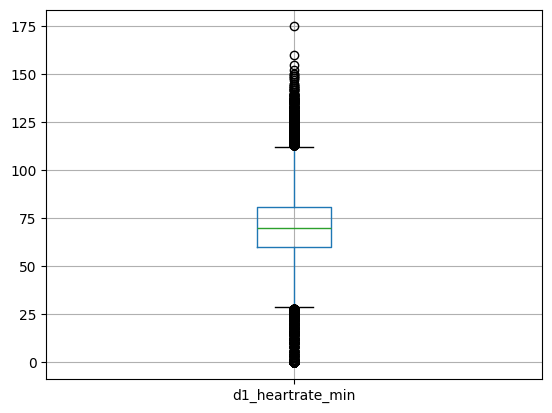

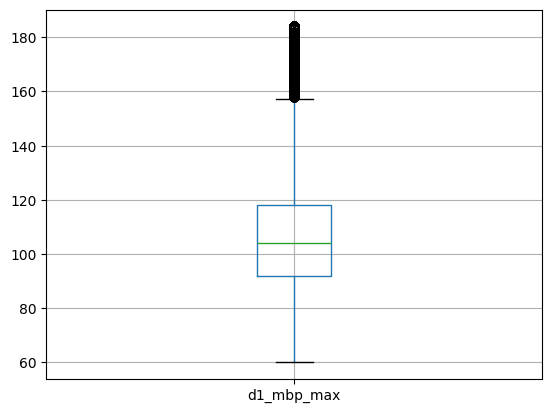

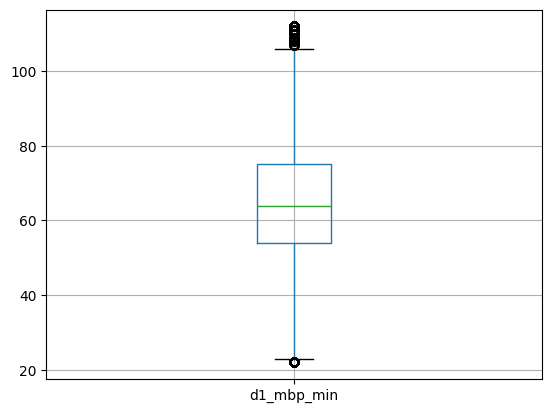

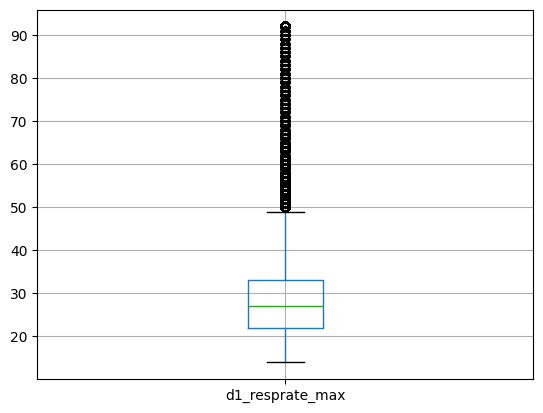

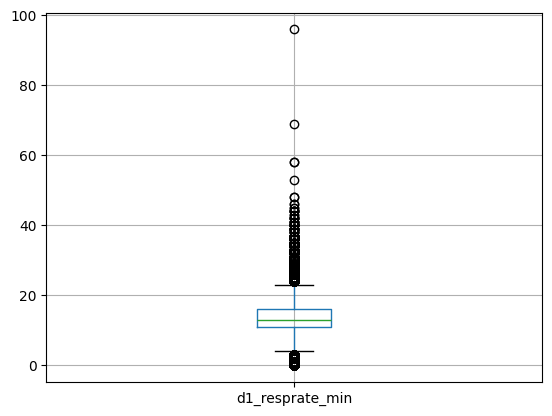

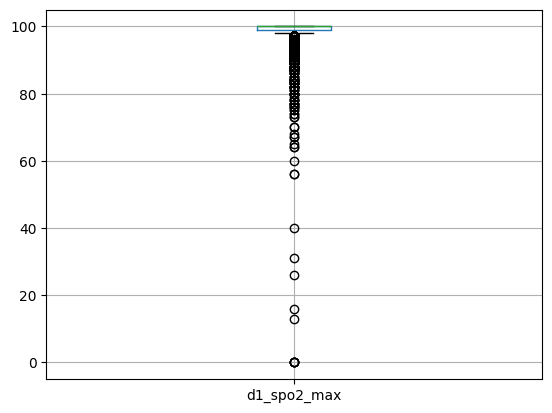

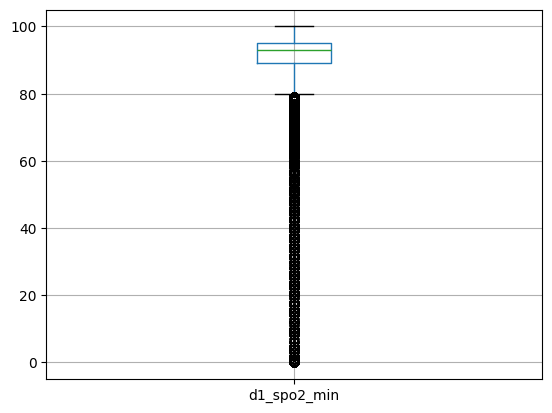

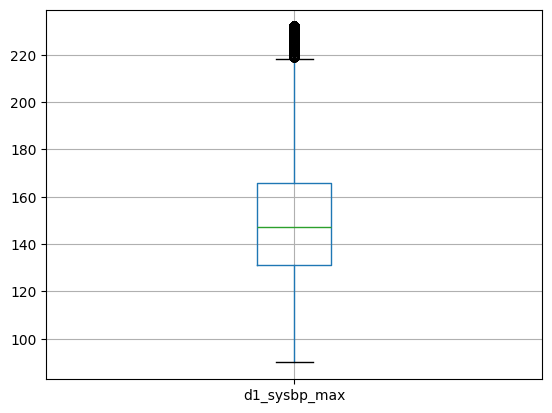

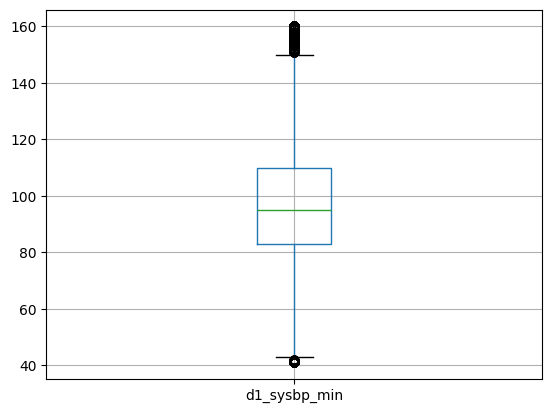

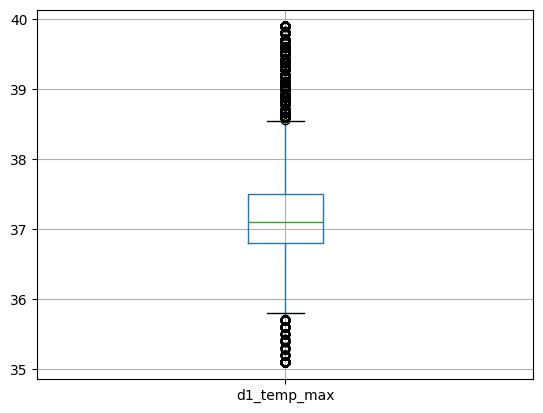

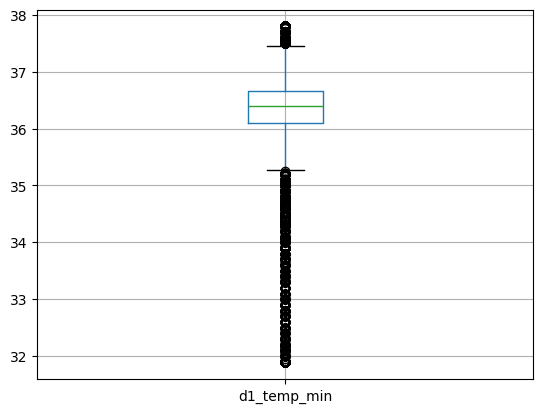

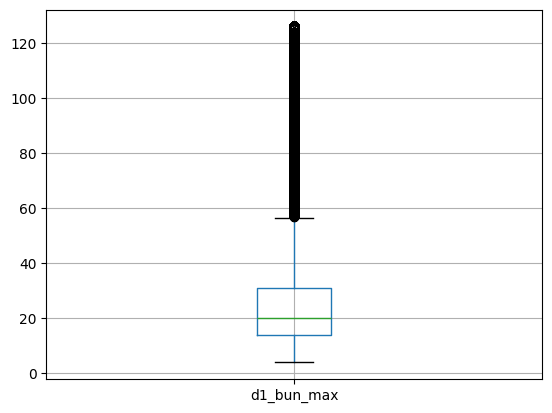

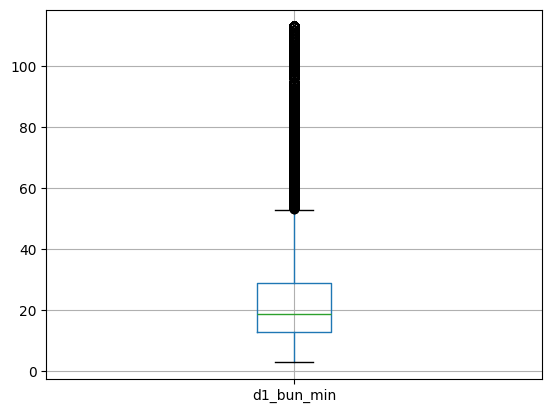

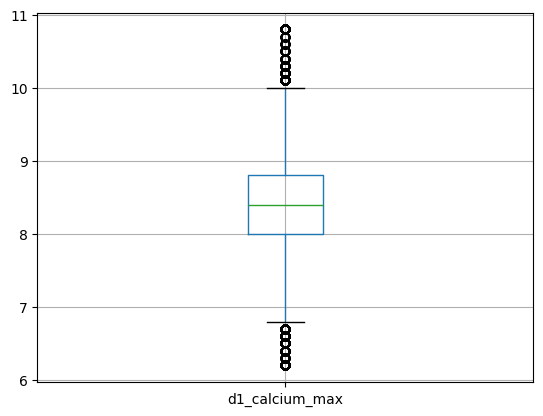

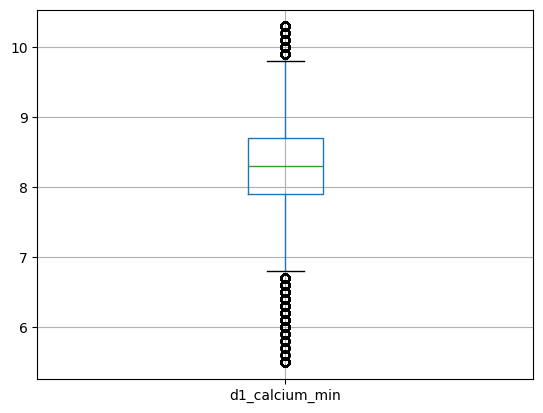

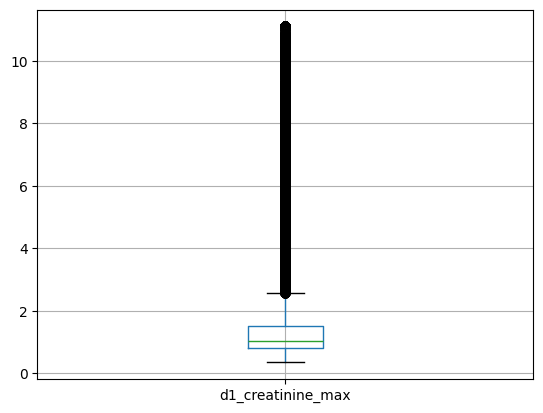

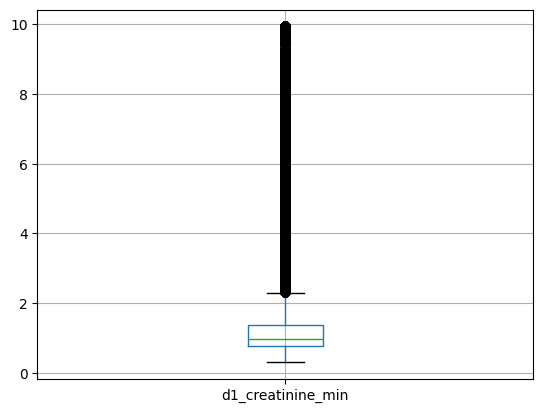

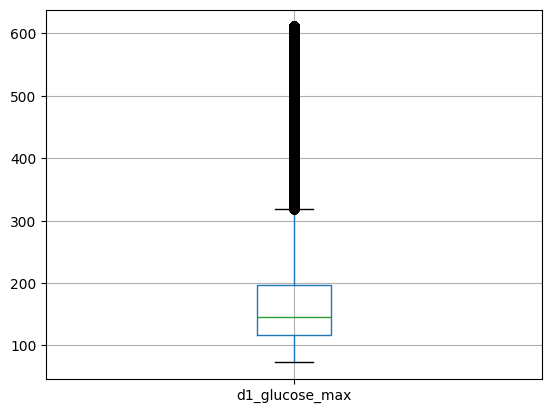

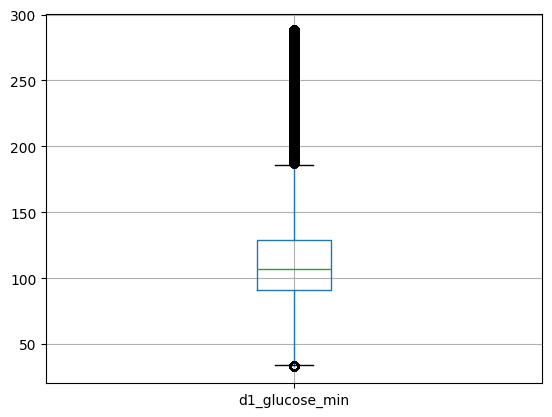

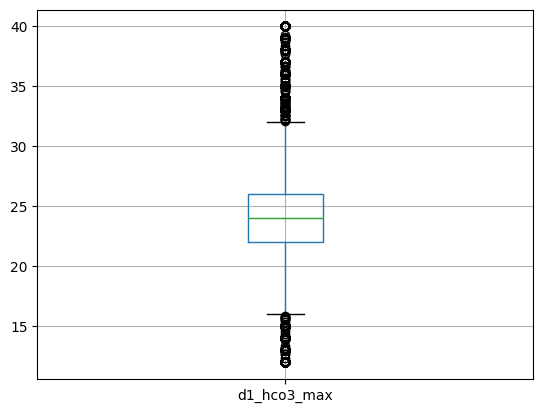

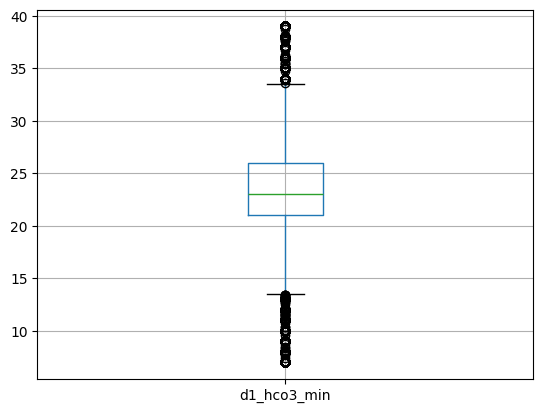

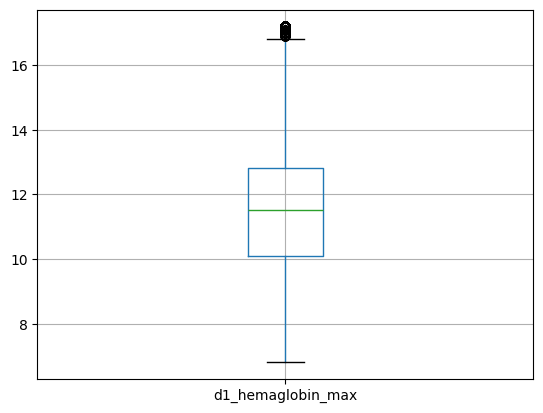

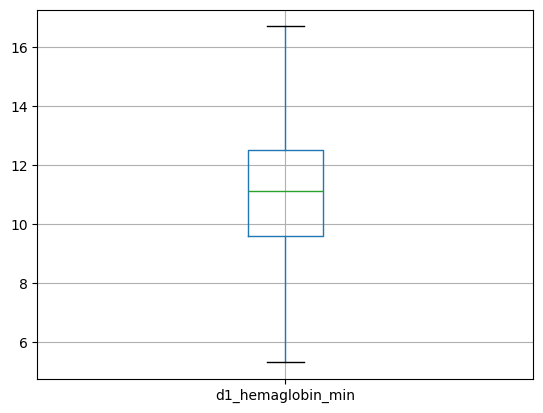

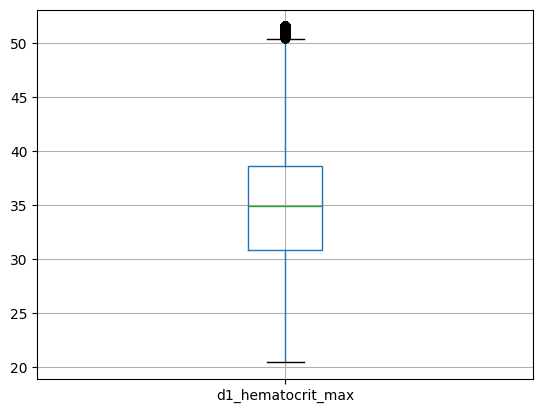

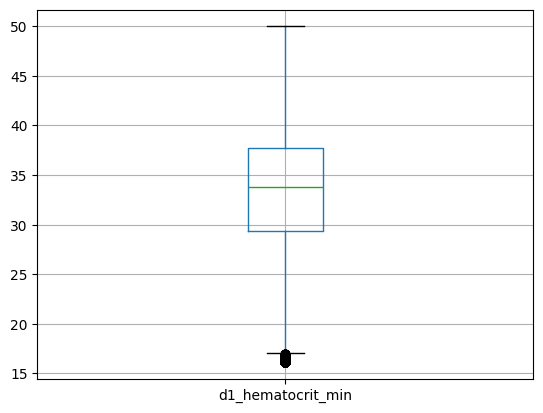

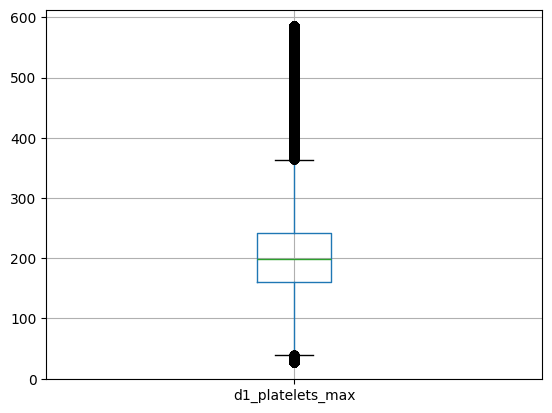

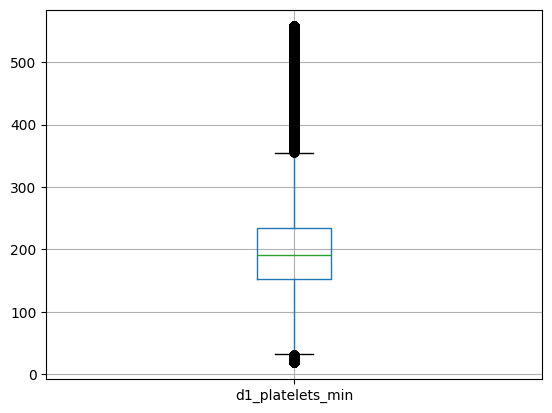

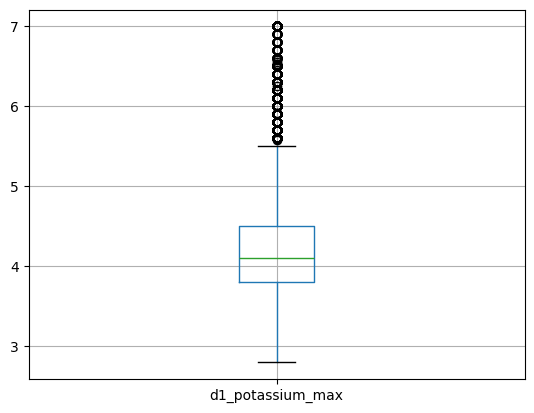

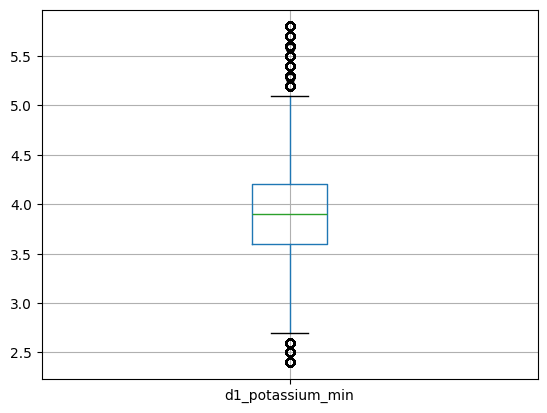

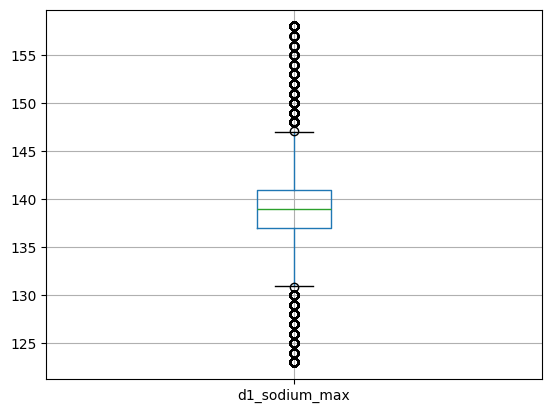

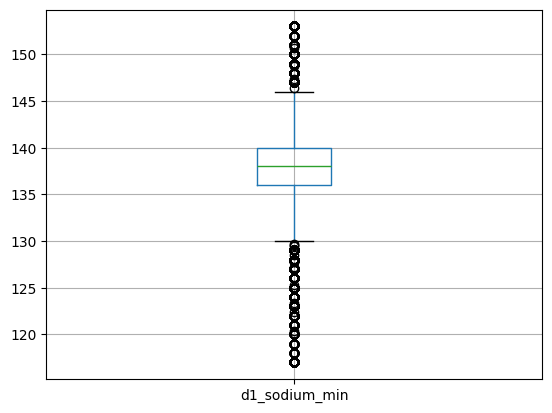

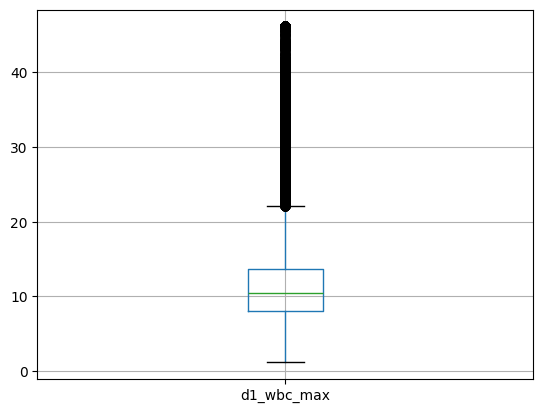

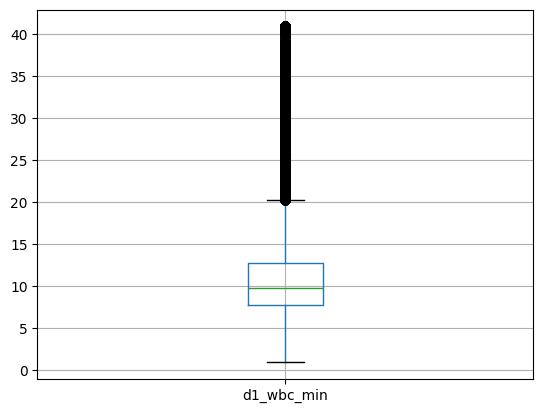

In [140]:
for column in nums_post:
    plt.figure()
    nums_post.boxplot([column])

In [141]:
boolean_mask = (X_post["d1_resprate_max"] < 70) & (X_post["d1_resprate_min"] < 50) & (X_post["d1_bun_max"] < 80) & (X_post["d1_bun_min"] < 80) & (X_post["d1_calcium_max"] < 10) & (X_post["d1_calcium_min"] < 10)

In [142]:
X_post = X_post[boolean_mask]

In [143]:
X_post.shape

(70242, 45)

In [145]:
X_post.head(3)

,ethnicity,gender,diabetes_mellitus,cirrhosis,hepatic_failure,immunosuppression,solid_tumor_with_metastasis,age,bmi,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,Caucasian,M,1.0,0.0,0.0,0.0,0.0,68.0,22.73,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1
1,Caucasian,F,1.0,0.0,0.0,0.0,0.0,77.0,27.42,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7
2,Caucasian,F,0.0,0.0,0.0,0.0,0.0,25.0,31.95,88.0,48.0,96.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,20.0,19.0,8.4,8.3,1.01,0.98,146.0,107.0,24.0,23.0,11.5,11.1,34.9,33.8,199.0,191.0,4.1,3.9,139.0,138.0,10.5,9.8


In [144]:
X_post_str = X_post[["ethnicity", "gender", "diabetes_mellitus", "cirrhosis", "hepatic_failure", "immunosuppression", "solid_tumor_with_metastasis"]]
X_post_nums = X_post.drop(columns = ["ethnicity", "gender", "diabetes_mellitus", "cirrhosis", "hepatic_failure", "immunosuppression", "solid_tumor_with_metastasis"])

In [146]:
X_post_str

,ethnicity,gender,diabetes_mellitus,cirrhosis,hepatic_failure,immunosuppression,solid_tumor_with_metastasis
0,Caucasian,M,1.0,0.0,0.0,0.0,0.0
1,Caucasian,F,1.0,0.0,0.0,0.0,0.0
2,Caucasian,F,0.0,0.0,0.0,0.0,0.0
3,Caucasian,M,0.0,0.0,0.0,0.0,0.0
4,Caucasian,M,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
74857,Caucasian,F,0.0,0.0,0.0,0.0,0.0
74858,Caucasian,M,1.0,0.0,0.0,0.0,1.0
74859,Caucasian,F,0.0,0.0,0.0,0.0,0.0
74860,Caucasian,M,1.0,0.0,0.0,0.0,0.0


In [147]:
ohe = OneHotEncoder(sparse_output=False, drop = "if_binary", handle_unknown="ignore")

ohe.fit(X_post_str[["ethnicity"]])
X_post_str[ohe.get_feature_names_out()] = ohe.transform(X_post_str[["ethnicity"]])
X_post_str.drop(columns = "ethnicity", inplace = True)

/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/1737110249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_str[ohe.get_feature_names_out()] = ohe.transform(X_post_str[["ethnicity"]])
/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/1737110249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_str[ohe.get_feature_names_out()] = ohe.transform(X_post_str[["ethnicity"]])
/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/1737110249.py:4: SettingW

In [148]:
ohe.fit(X_post_str[["gender"]])
X_post_str[ohe.get_feature_names_out()] = ohe.transform(X_post_str[["gender"]])
X_post_str.drop(columns = "gender", inplace = True)

/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/3266494125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_str[ohe.get_feature_names_out()] = ohe.transform(X_post_str[["gender"]])
/var/folders/zq/1wl8hhqj5b5bd4_f0k9w8g4r0000gn/T/ipykernel_48303/3266494125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_str.drop(columns = "gender", inplace = True)


In [149]:
X_post_str

,diabetes_mellitus,cirrhosis,hepatic_failure,immunosuppression,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74858,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
74859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [150]:
X_post = pd.concat([X_post_str, X_post_nums], axis = 1, sort = False)

In [151]:
mm_scaler = MinMaxScaler()

X_preprocessed = mm_scaler.fit_transform(X_post)

In [152]:
X_preprocessed = pd.DataFrame(X_preprocessed, columns = X_post.columns)
X_preprocessed

,diabetes_mellitus,cirrhosis,hepatic_failure,immunosuppression,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,age,bmi,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.712329,0.148859,0.184874,0.311688,0.512605,0.411429,0.233871,0.266667,0.363636,0.208333,1.00,0.74,0.288732,0.268908,1.000000,0.898494,0.358566,0.355263,0.621622,0.431818,0.201486,0.200251,0.176580,0.298039,0.250000,0.25000,0.201923,0.315789,0.225080,0.333333,0.369176,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.835616,0.237400,0.411765,0.233766,0.504202,0.411429,0.483871,0.177778,0.327273,0.250000,1.00,0.70,0.485915,0.218487,0.250000,0.543224,0.092961,0.078947,0.648649,0.568182,0.034355,0.026977,0.133829,0.372549,0.535714,0.59375,0.432692,0.508772,0.530547,0.589971,0.949821,0.869271,0.333333,0.411765,0.628571,0.777778,0.492424,0.295015
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.123288,0.322920,0.352941,0.454545,0.319328,0.388571,0.338710,0.511111,0.127273,0.166667,0.98,0.91,0.408451,0.537815,0.395833,0.813906,0.212483,0.210526,0.594595,0.636364,0.062210,0.070555,0.135688,0.290196,0.428571,0.50000,0.451923,0.508772,0.466238,0.522124,0.308244,0.320004,0.309524,0.441176,0.457143,0.583333,0.207219,0.222511
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.041096,0.238919,0.445378,0.571429,0.260504,0.342857,0.354839,0.755556,0.072727,0.333333,1.00,0.96,0.401408,0.663866,0.437500,0.813906,0.212483,0.210526,0.594595,0.636364,0.062210,0.070555,0.135688,0.290196,0.428571,0.50000,0.451923,0.508772,0.466238,0.522124,0.308244,0.320004,0.309524,0.441176,0.457143,0.583333,0.207219,0.222511
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.698630,0.240043,0.453782,0.623377,0.462185,0.474286,0.540323,0.644444,0.327273,0.208333,0.97,0.91,0.584507,0.554622,0.354167,0.796989,0.119522,0.131579,0.702703,0.750000,0.034355,0.042540,0.154275,0.360784,0.535714,0.62500,0.846154,0.903509,0.765273,0.828909,0.236559,0.260623,0.261905,0.382353,0.400000,0.555556,0.216132,0.250013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.657534,0.360366,0.504202,0.116883,0.352941,0.445714,0.427419,0.211111,0.218182,0.270833,1.00,0.79,0.330986,0.302521,0.375000,0.830824,0.889774,0.894737,0.810811,0.840909,0.284123,0.321647,0.081784,0.329412,0.428571,0.50000,0.173077,0.289474,0.221865,0.330383,0.550179,0.585359,0.547619,0.794118,0.400000,0.555556,0.148619,0.174259
70238,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.808219,0.155094,0.487395,0.402597,0.478992,0.400000,0.395161,0.288889,0.236364,0.187500,1.00,0.85,0.267606,0.218487,0.645833,0.796989,0.305445,0.315789,0.540541,0.613636,0.070566,0.083006,0.607807,0.603922,0.571429,0.65625,0.615385,0.692982,0.598071,0.675516,0.116487,0.136296,0.333333,0.529412,0.485714,0.638889,0.099822,0.119506
70239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.547945,0.610434,0.226891,0.350649,0.352941,0.434286,0.177419,0.277778,0.345455,0.250000,1.00,0.45,0.260563,0.201681,0.479167,0.712401,0.398406,0.407895,0.432432,0.522727,0.181987,0.207514,0.193309,0.564706,0.642857,0.71875,0.355769,0.456140,0.405145,0.498525,0.189964,0.212377,0.238095,0.4

In [153]:
label_encoder = LabelEncoder()

y_binary_preprocessed = label_encoder.fit_transform(y)
y_binary_preprocessed = pd.DataFrame(y_binary_preprocessed)

In [154]:
y_cont_preprocessed = data["apache_4a_icu_death_prob"]
y_cont_preprocessed = pd.DataFrame(y_cont_preprocessed)
y_cont_preprocessed.rename(columns = {"apache_4a_icu_death_prob":"mortality_prob"}, inplace = True)
y_cont_preprocessed

,mortality_prob
0,0.05
1,0.29
2,0.00
3,0.03
4,NaN
...,...
91708,0.05
91709,0.02
91710,0.02
91711,0.02


In [155]:
np.sqrt(len(X_preprocessed))

265.03207353073327

In [156]:
X_preprocessed.drop(columns = ["d1_bun_min", "d1_creatinine_min", "d1_hematocrit_max", "d1_hematocrit_min", "d1_hemaglobin_max", "d1_platelets_max"], inplace = True)

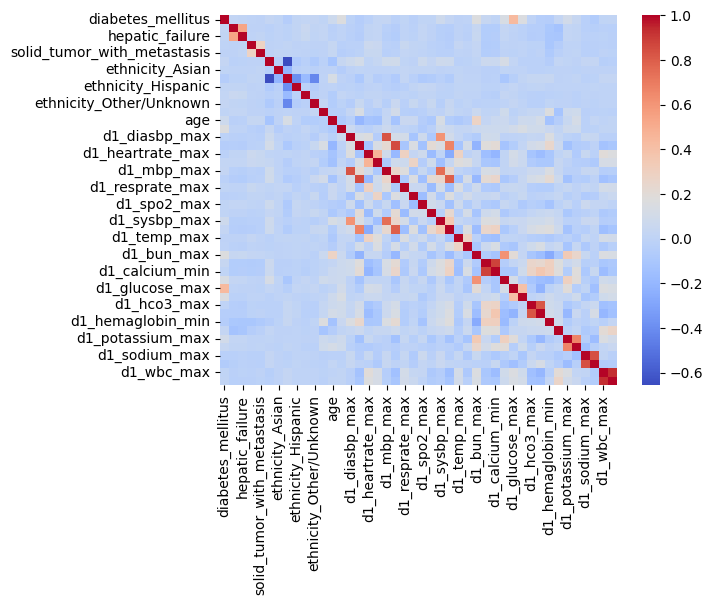

In [157]:
corr = X_preprocessed.corr()

sns.heatmap(corr, cmap = "coolwarm", annot = False);

In [158]:
corr_df = corr.stack().reset_index()

no_self_correlation = (corr_df["level_0"] != corr_df["level_1"])

corr_df = corr_df[no_self_correlation]

corr_df[0] = np.abs(corr_df[0])

In [159]:
corr_df.sort_values(by = 0, ascending=False).head(20)

,level_0,level_1,0
1934,d1_wbc_min,d1_wbc_max,0.934406
1891,d1_wbc_max,d1_wbc_min,0.934406
1306,d1_calcium_max,d1_calcium_min,0.882398
1349,d1_calcium_min,d1_calcium_max,0.882398
679,d1_diasbp_min,d1_mbp_min,0.856166
851,d1_mbp_min,d1_diasbp_min,0.856166
1844,d1_sodium_min,d1_sodium_max,0.843793
1801,d1_sodium_max,d1_sodium_min,0.843793
634,d1_diasbp_max,d1_mbp_max,0.830736
806,d1_mbp_max,d1_diasbp_max,0.830736


In [160]:
X_preprocessed.head(4)

,diabetes_mellitus,cirrhosis,hepatic_failure,immunosuppression,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,age,bmi,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_bun_max,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_min,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.712329,0.148859,0.184874,0.311688,0.512605,0.411429,0.233871,0.266667,0.363636,0.208333,1.00,0.74,0.288732,0.268908,1.000000,0.898494,0.358566,0.621622,0.431818,0.201486,0.176580,0.298039,0.250000,0.25000,0.315789,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.835616,0.237400,0.411765,0.233766,0.504202,0.411429,0.483871,0.177778,0.327273,0.250000,1.00,0.70,0.485915,0.218487,0.250000,0.543224,0.092961,0.648649,0.568182,0.034355,0.133829,0.372549,0.535714,0.59375,0.508772,0.869271,0.333333,0.411765,0.628571,0.777778,0.492424,0.295015
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.123288,0.322920,0.352941,0.454545,0.319328,0.388571,0.338710,0.511111,0.127273,0.166667,0.98,0.91,0.408451,0.537815,0.395833,0.813906,0.212483,0.594595,0.636364,0.062210,0.135688,0.290196,0.428571,0.50000,0.508772,0.320004,0.309524,0.441176,0.457143,0.583333,0.207219,0.222511
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.041096,0.238919,0.445378,0.571429,0.260504,0.342857,0.354839,0.755556,0.072727,0.333333,1.00,0.96,0.401408,0.663866,0.437500,0.813906,0.212483,0.594595,0.636364,0.062210,0.135688,0.290196,0.428571,0.50000,0.508772,0.320004,0.309524,0.441176,0.457143,0.583333,0.207219,0.222511


In [161]:
y_binary_preprocessed.head(3)

,0
0,0
1,0
2,0


In [162]:
y_cont_preprocessed.head(3)

,mortality_prob
0,0.05
1,0.29
2,0.00


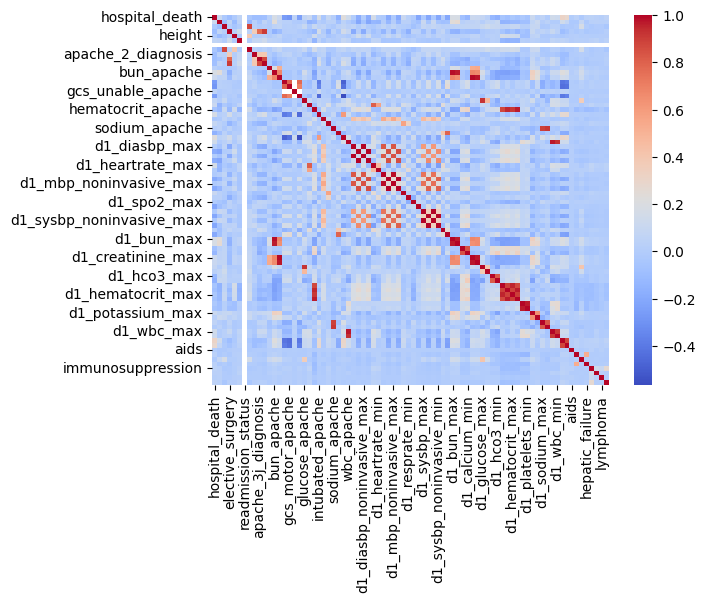

In [118]:
# Create a correlation matrix
correlation_matrix = df_d1_num_filtered.corr()
# Create a heatmap with color gradient
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

In [116]:
import seaborn as sns
import pandas as pd
import numpy as np

# Extract upper triangle of the correlation matrix (excluding diagonal)
mask = np.tril(np.ones(correlation_matrix.shape)).astype(bool)
mask[np.diag_indices_from(mask)] = False  # Exclude diagonal elements
upper_triangle = correlation_matrix[mask]

# Convert upper triangle to a list (using NumPy's reshape and ravel)
correlation_values = upper_triangle.values.reshape(-1)  # Reshape values to 1D array

# Extract corresponding column names based on mask indices
corr_pairs = list(zip(*np.where(correlation_matrix != 1)))  # Avoids self-correlation

# Separate positive and negative correlations
positive_pairs = [(corr, pair) for corr, pair in zip(correlation_values, corr_pairs) if corr > 0]
negative_pairs = [(corr, pair) for corr, pair in zip(correlation_values, corr_pairs) if corr < 0]

# Sort by correlation values (descending order for positive, ascending for negative)
sorted_positive_pairs = sorted(positive_pairs, key=lambda x: x[0], reverse=True)
sorted_negative_pairs = sorted(negative_pairs, key=lambda x: abs(x[0]), reverse=True)

print("Top 10 Positive Correlations:")
for i in range(10):
  corr, (col1_idx, col2_idx) = sorted_positive_pairs[i]
  col1 = df_d1_num.columns[col1_idx]  # Get header names using indices
  col2 = df_d1_num.columns[col2_idx]
  print(f"{col1} - {col2}: {corr:.2f}")  # Format correlation value to 2 decimal places

print("\nTop 10 Largest Negative Correlations:")
for i in range(10):
  corr, (col1_idx, col2_idx) = sorted_negative_pairs[i]
  col1 = df_d1_num.columns[col1_idx]
  col2 = df_d1_num.columns[col2_idx]
  print(f"{col1} - {col2}: {corr:.2f}")  # Format correlation value to 2 decimal places


Top 10 Positive Correlations:
encounter_id - hospital_id: 1.00
patient_id - age: 1.00
hospital_id - bmi: 1.00
hospital_death - height: 1.00
age - icu_id: 1.00
bmi - pre_icu_los_days: 1.00
elective_surgery - readmission_status: 1.00
height - weight: 1.00
icu_id - albumin_apache: 1.00
pre_icu_los_days - apache_2_diagnosis: 1.00

Top 10 Largest Negative Correlations:
d1_albumin_min - d1_diasbp_noninvasive_min: -0.24
d1_bilirubin_max - d1_heartrate_max: -0.24
d1_bilirubin_min - d1_heartrate_min: -0.24
d1_bun_max - d1_mbp_invasive_max: -0.24
d1_bun_min - d1_mbp_invasive_min: -0.24
d1_calcium_max - d1_mbp_max: -0.24
d1_calcium_min - d1_mbp_min: -0.24
d1_creatinine_max - d1_mbp_noninvasive_max: -0.24
d1_creatinine_min - d1_mbp_noninvasive_min: -0.24
d1_glucose_max - d1_resprate_max: -0.24


In [119]:
correlation_matrix = df_d1_num.corr()

# Get the correlation between 'hospital_death' and other columns
hospital_death_correlation = correlation_matrix['apache_4a_icu_death_prob']
sorted_correlation = hospital_death_correlation.sort_values(ascending=False)

# Print the top 10 and bottom 10 results (excluding 'hospital_death' itself)
print("Top 10 Positive Correlations with hospital_death:")
print(sorted_correlation.head(11).drop('hospital_death'))  # Exclude hospital_death

print("\nBottom 10 Correlations with hospital_death:")
print(sorted_correlation.tail(11))

Top 10 Positive Correlations with hospital_death:
apache_4a_icu_death_prob         1.000000
apache_4a_hospital_death_prob    0.878988
d1_lactate_max                   0.330684
d1_lactate_min                   0.292416
ventilated_apache                0.284239
intubated_apache                 0.275508
fio2_apache                      0.258017
bun_apache                       0.176396
d1_bun_max                       0.165053
d1_heartrate_max                 0.148973
Name: apache_4a_icu_death_prob, dtype: float64

Bottom 10 Correlations with hospital_death:
temp_apache             -0.189813
d1_mbp_invasive_min     -0.190741
albumin_apache          -0.196927
d1_sysbp_invasive_min   -0.201564
ph_apache               -0.205283
d1_arterial_ph_min      -0.234876
d1_temp_min             -0.240512
gcs_verbal_apache       -0.363716
gcs_eyes_apache         -0.388813
gcs_motor_apache        -0.428237
readmission_status            NaN
Name: apache_4a_icu_death_prob, dtype: float64
